In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.utils import shuffle
from tqdm import tqdm

2023-06-15 13:26:16.751708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 13:26:18.467413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
PRETRAINED = True
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 2


2023-06-15 13:26:25.548468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 13:26:25.551199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 13:26:25.656030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [18]:
data = np.load("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/EMData-20230220.npy")
data.shape

(10000, 2, 25, 30)

In [21]:
dataX = np.load("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/crystal_array.npy")
dataY = np.load("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/cluster_array.npy")

dataX = np.transpose(dataX, axes=[0,2,1])
dataY = np.transpose(dataY, axes=[0,2,1])
data = np.stack([dataX,dataY], axis=1)
data.shape

(11592, 2, 25, 30)

In [26]:
np.save("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/EMData-validation.npy", data)

### Test Data Prediction

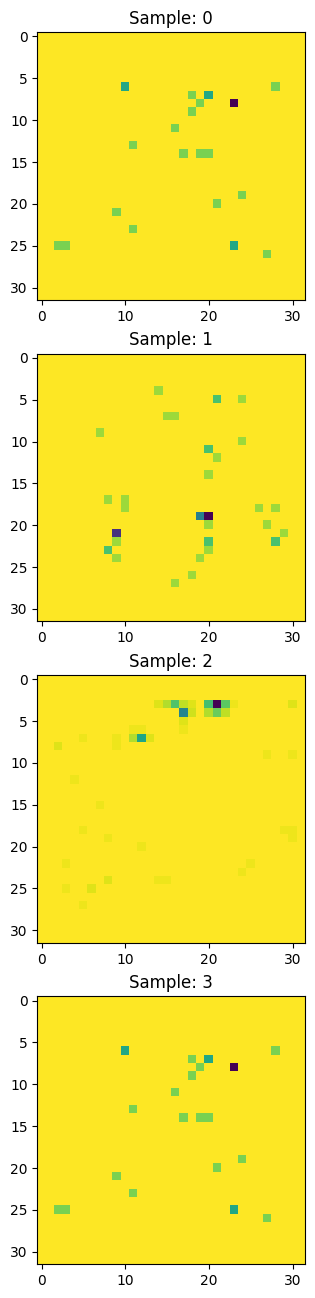

In [22]:
BASE_PATH = "/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/RealDataImages/"
IMG_PATH = 'input/'
num = 10

input_img_paths = sorted(
    [
        os.path.join(BASE_PATH, IMG_PATH, fname)
        for fname in os.listdir(BASE_PATH+IMG_PATH)
        if fname.endswith(".png") and "(" not in fname
    ]
)[:num]

num_example_to_display = 4

sample_idxs = np.random.randint(0, len(input_img_paths)-1, size=(num_example_to_display,))
#print(sample_idxs)

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=1, figsize=(12,4*num_example_to_display))

for i, sample_idx in enumerate(sample_idxs):
    img = Image.open(input_img_paths[sample_idx])
    axs[i].set_title("Sample: %d" %i)
    axs[i].imshow(img)

In [ ]:
## Add Data Generator With Input Samples Only

In [6]:
IMG_SHAPE = 32

def normalize(image):
    image = tf.cast(image, tf.float32) / 255.0
    #mask -= 1
    return image

def load_and_preprocess(img_filepath):
    img = tf.io.read_file(img_filepath)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SHAPE, IMG_SHAPE])

    #mask = tf.io.read_file(mask_filepath)
    #mask = tf.io.decode_png(mask, channels=1)
    #mask = tf.image.resize(mask, [IMG_SHAPE, IMG_SHAPE])

    img = normalize(img)
    return img

In [18]:
sample1 = load_and_preprocess(input_img_paths[0])
sample1 = np.expand_dims(sample1, axis=0)

In [16]:
#pred_mask_i = model.predict(val_img_i)
#pred_mask_i = np.argmax(pred_mask_i, axis=-1)
#pred_mask_i = np.expand_dims(pred_mask_i, axis=-1)

In [19]:
sample1.shape

(1, 32, 32, 3)

In [23]:
from keras.models import load_model

Model_logs = {"ENET": ["run-20230226_175518-8y9uyk1u"], 
             "UNETv2LITE": ["run-20230227_185529-sjhgebn1"],
              "UNETv3LITE": ["run-20230303_140554-80pvvkn4"], # model1
              "UNETv4LITE": ["run-20230308_112406-8zhdka9h"], # model2
             "HEPAENET":["run-20230227_181304-zog286i7"],
             "HEPCONVNET": ["run-20230227_184034-2315xvt8"]}


if PRETRAINED == True:
    MODEL_PATH = "/nfs_scratch/hsharma/MachineLearning/ClusterFinder/notebooks/wandb/run-20230303_140554-80pvvkn4/files/model-best.h5"
    model = load_model(MODEL_PATH)

2023-06-15 13:34:08.004888: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 13:34:08.006374: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 13:34:08.007812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [24]:
val_imgs, pred_masks = [], []
for img_path in input_img_paths:
    val_img = load_and_preprocess(img_path)
    val_imgs.append(val_img)
    
    val_img = np.expand_dims(val_img, axis=0)
    pred_mask_i = model.predict(val_img)
    pred_mask_i = np.argmax(pred_mask_i, axis=-1)
    pred_mask_i = np.expand_dims(pred_mask_i, axis=-1)
    
    #switch to load, pred and display strategy for scale later
    pred_masks.extend(pred_mask_i)

NameError: name 'load_and_preprocess' is not defined

In [56]:
val_imgs = np.array(val_imgs)
pred_masks = np.array(pred_masks)

In [57]:
val_imgs.shape

(10, 32, 32, 3)

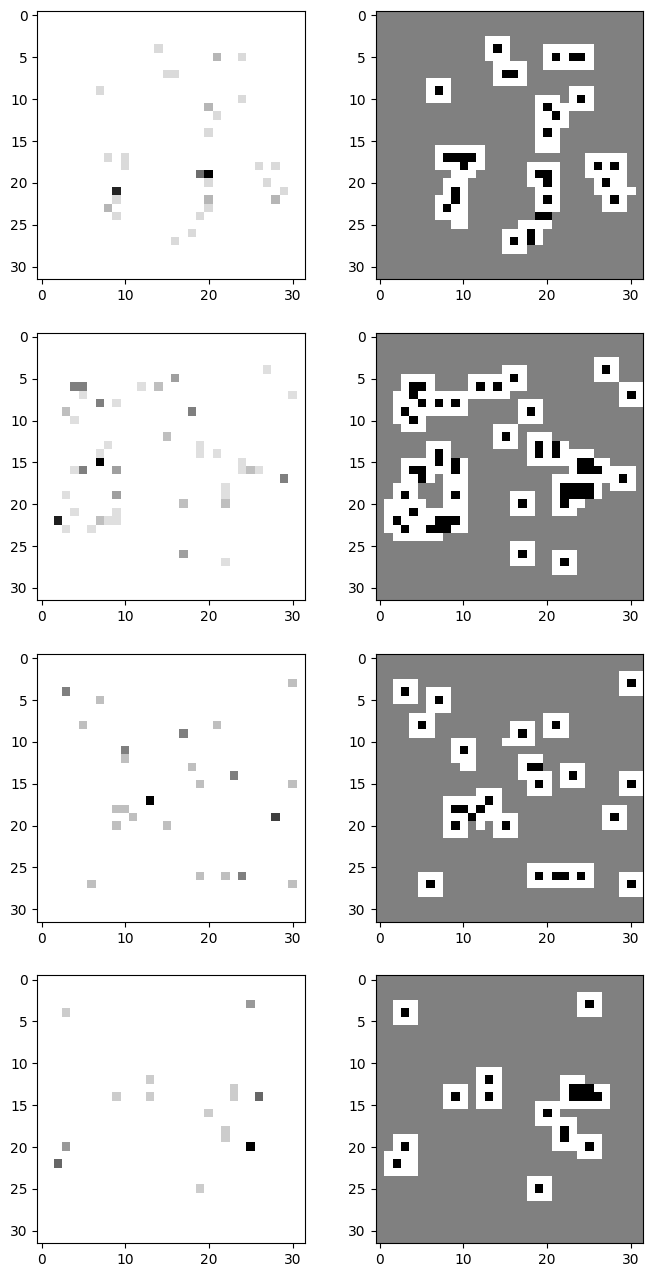

In [58]:
# Prediction Visuals
num_example_to_display = 4

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=2, figsize=(8,4*num_example_to_display))
  
for i in range(num_example_to_display):
    axs[i][0].imshow(val_imgs[i])
    axs[i][1].imshow(np.squeeze(pred_masks[i],-1), cmap='gray')

In [59]:
np.unique(pred_masks)

array([0, 1, 2])

In [70]:
pred_masks[np.where(pred_masks == 2)] = 1

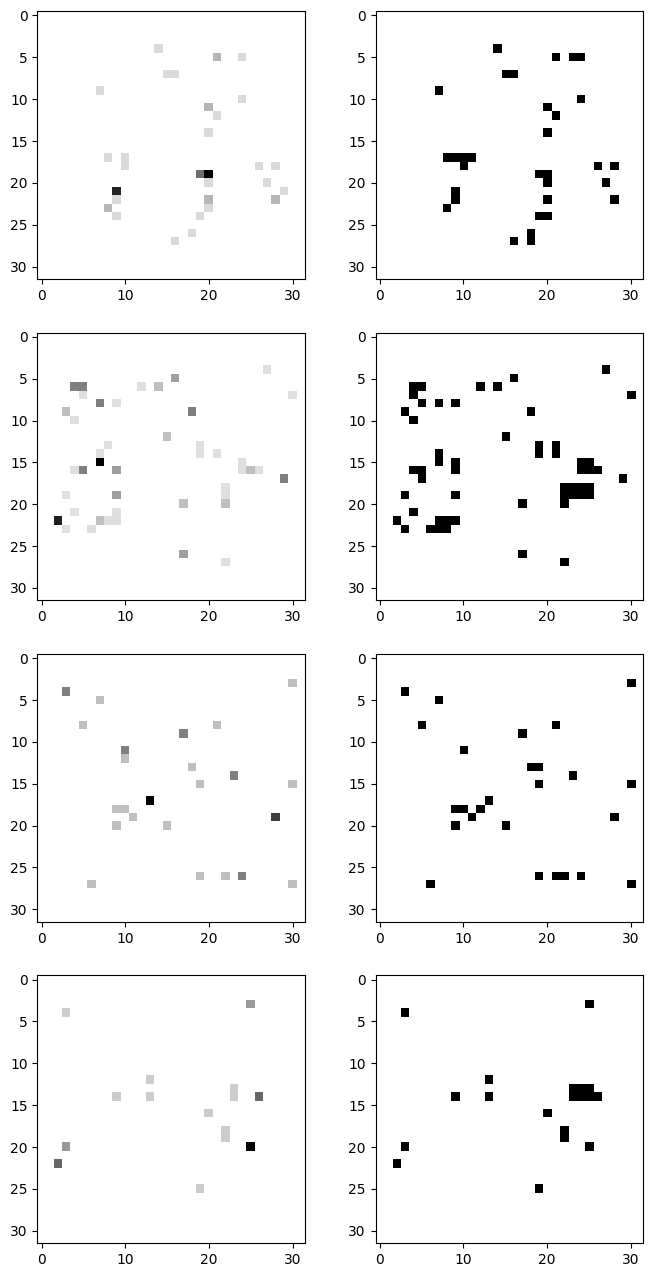

In [71]:
# Prediction Visuals
num_example_to_display = 4

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=2, figsize=(8,4*num_example_to_display))
  
for i in range(num_example_to_display):
    axs[i][0].imshow(val_imgs[i])
    axs[i][1].imshow(np.squeeze(pred_masks[i],-1), cmap='gray')

In [ ]:
#Faliure Observations

1. In 4th example, nearby extra joint prediction
2. In 3rd example, extra diagonal prediction

### Labelled Data Visuals and Processing

In [ ]:
# Test Data Path:

#TODO: Data generation
BASE_PATH = "/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/images/"
IMG_PATH = 'input/'
ANNOTATION_PATH = 'trimaps/'
num = 10000

input_img_paths = sorted(
    [
        os.path.join(BASE_PATH, IMG_PATH, fname)
        for fname in os.listdir(BASE_PATH+IMG_PATH)
        if fname.endswith(".png") and "(" not in fname
    ]
)[:num]


annotation_img_paths = []

for fname in tqdm(input_img_paths[:num]):
    annp = os.path.join(BASE_PATH, ANNOTATION_PATH, fname.split("/")[-1].replace("img", "annm"))
    if os.path.isfile(annp):
        annotation_img_paths.append(annp)
        input_img_paths.append(fname)
    else:
        pass

#input_img_paths = input_img_paths[num:]
#len(input_img_paths), len(annotation_img_paths)

num_example_to_display = 4

sample_idxs = np.random.randint(0, len(input_img_paths)-1, size=(num_example_to_display,))
print(sample_idxs)

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=2, figsize=(12,4*num_example_to_display))

for i, sample_idx in enumerate(sample_idxs):
    img = Image.open(input_img_paths[sample_idx]) 
    mask = Image.open(annotation_img_paths[sample_idx])
    axs[i][0].imshow(img)
    axs[i][1].imshow(mask, cmap='gray')

In [ ]:
IMG_SHAPE = 32

def normalize(image, mask):
    image = tf.cast(image, tf.float32) / 255.0
    mask -= 1
    return image, mask

def load_and_preprocess(img_filepath, mask_filepath):
    img = tf.io.read_file(img_filepath)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SHAPE, IMG_SHAPE])

    mask = tf.io.read_file(mask_filepath)
    mask = tf.io.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_SHAPE, IMG_SHAPE])

    img, mask = normalize(img, mask)

    return img, mask

In [ ]:
# generating testset loader
BATCH_SIZE = 1
AUTO = tf.data.experimental.AUTOTUNE

input_img_paths, annotation_img_paths = shuffle(input_img_paths, annotation_img_paths, random_state=42)

input_img_paths_test, annotation_img_paths_test = input_img_paths, annotation_img_paths
maintestloader = tf.data.Dataset.from_tensor_slices((input_img_paths_test, annotation_img_paths_test))

testloader = (
    maintestloader
    .map(load_and_preprocess, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [ ]:
num_example_to_display = 4

img, mask = next(iter(testloader))

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=2, figsize=(12,4*num_example_to_display))

for i in range(num_example_to_display):
    axs[i][0].imshow(img[i]);
    axs[i][1].imshow(np.squeeze(mask[i],-1), cmap='gray');

### Inference and Visuals

In [ ]:
from keras.models import load_model

Model_logs = {"ENET": ["run-20230226_175518-8y9uyk1u"], 
             "UNETv2LITE": ["run-20230227_185529-sjhgebn1"],
              "UNETv3LITE": ["run-20230303_140554-80pvvkn4"], # model1
              "UNETv4LITE": ["run-20230308_112406-8zhdka9h"], # model2
             "HEPAENET":["run-20230227_181304-zog286i7"],
             "HEPCONVNET": ["run-20230227_184034-2315xvt8"]}


if PRETRAINED == True:
    MODEL_PATH = "/nfs_scratch/hsharma/MachineLearning/ClusterFinder/notebooks/wandb/run-20230303_140554-80pvvkn4/files/model-best.h5"
    model = load_model(MODEL_PATH)

In [ ]:
val_img, val_mask, pred_mask = [], [], []

for _ in range(num):
    val_img_i, val_mask_i = next(iter(testloader))
    pred_mask_i = model.predict(val_img_i)
    pred_mask_i = np.argmax(pred_mask_i, axis=-1)
    pred_mask_i = np.expand_dims(pred_mask_i, axis=-1)

    val_img.extend(val_img_i)
    val_mask.extend(val_mask_i)
    pred_mask.extend(pred_mask_i)

In [ ]:
val_img = np.array(val_img)
val_mask = np.array(val_mask)
pred_mask = np.array(pred_mask)

In [ ]:
num_example_to_display = 4

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))
  
for i in range(num_example_to_display):
    axs[i][0].imshow(val_img[i])
    axs[i][1].imshow(np.squeeze(val_mask[i],-1), cmap='gray');
    axs[i][2].imshow(np.squeeze(pred_mask[i],-1), cmap='gray')

In [ ]:
## Removing Border Markings

In [ ]:
val_mask[np.where(val_mask == 2)] = 1
pred_mask[np.where(pred_mask == 2)] = 1

In [ ]:
num_example_to_display = 4

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))

for i in range(num_example_to_display):
    axs[i][0].imshow(val_img[i])
    axs[i][1].imshow(np.squeeze(val_mask[i],-1), cmap='gray')
    axs[i][2].imshow(np.squeeze(pred_mask[i],-1), cmap='gray')

In [12]:
# semantic to instance convertion

def ccl_generator(pred, mc_truth):
    test_image = np.squeeze(pred).astype("uint8")
    thresh = cv2.threshold(test_image, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    output_pred = cv2.connectedComponentsWithStats(
        thresh, 4, cv2.CV_32S)
    (numLabels_pred, labels_pred, stats_pred, centroids) = output_pred

    test_image = np.squeeze(mc_truth).astype("uint8")
    thresh = cv2.threshold(test_image, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    output_mc = cv2.connectedComponentsWithStats(
        thresh, 4, cv2.CV_32S)
    (numLabels_mc, labels_mc, stats_mc, centroids) = output_mc

    return labels_pred, labels_mc

In [ ]:
num_example_to_display = 4
fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))
  
for i in range(num_example_to_display):
    lpred, lmc = ccl_generator(pred_mask[i], val_mask[i])
    axs[i][0].imshow(val_img[i])
    axs[i][1].imshow(lmc)
    axs[i][2].imshow(lpred)

### Performance Testing

In [ ]:
def eta_phi_res(ROI_mc, ROI_algo):
    eta_mc = max(ROI_mc[0]) - min(ROI_mc[0])
    phi_mc = max(ROI_mc[1]) - min(ROI_mc[1])

    eta_algo = max(ROI_algo[0]) - min(ROI_algo[0])
    phi_algo = max(ROI_algo[1]) - min(ROI_algo[1])

    return abs(eta_mc - eta_algo), abs(phi_mc - phi_algo)

In [ ]:
def mc_label_convert(segmented_image, mc_truth):
    all_labels = np.unique(mc_truth)
    hm = {}
    # Background Matching
    u, c = np.unique(mc_truth, return_counts=True)
    bkg_label_mc = u[np.argmax(c)]
    
    u, c = np.unique(segmented_image, return_counts=True)
    bkg_label_algo = u[np.argmax(c)]
    
    hm[bkg_label_mc] = bkg_label_algo
    
    for curr_label in all_labels:
        if curr_label == bkg_label_mc:
            continue
            
        selected_ROI = segmented_image[np.where(mc_truth == curr_label)]
        u, c = np.unique(selected_ROI, return_counts=True)
        count_map = [x for x in zip(u,c) if x[0]!=bkg_label_algo]
        # max_overlap_index
        hm[curr_label] = max(count_map, key=lambda x:x[1])[0]
    
    # unmapped_labels
    unmapped = []
    for old_label in np.unique(segmented_image):
        if old_label not in hm.values():
            unmapped.append(old_label)
    
    uhm = {}
    max_mc_label = max(max(hm.keys()), max(hm.values()))+1
    for ol in unmapped:
        uhm[max_mc_label] = ol
        max_mc_label+=1
    
    # start mapping old_labels to mc_labels
    for label in uhm:
        mp = np.where(segmented_image==uhm[label])
        segmented_image[mp] = label
    
    for label in hm:
        mp = np.where(segmented_image==hm[label])
        segmented_image[mp] = label
    
    return segmented_image

In [ ]:
## TODO: ADD MC Label Debugging at this stage?

In [ ]:
# DEBUG
num_example_to_display = 4
algo_sup_predicted_i = [6,11]
fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))

for i in range(num_example_to_display):
    lpred, lmc = ccl_generator(pred_mask[i], val_mask[i])
    lpred = mc_label_convert(lpred, lmc)
    
    axs[j][0].imshow(val_img[i])
    axs[j][1].imshow(lmc)
    axs[j][2].imshow(lpred)

In [ ]:
def test(predicted, mc_truth, energy_snap):
    thresh = 2
    y_pred = []
    energy_dist = []
    for label in np.unique(mc_truth):
        if label == 0.0:
            continue

        matched, rel_energy = False, -1
        ROI_mc = np.where(mc_truth==label)
        ROI_algo = np.where(predicted==label)

        E_mc = np.sum(energy_snap[ROI_mc])
        E_algo = np.sum(energy_snap[ROI_algo])

        if len(ROI_algo[0]) == 0:
            matched = (False, "False Negative")
            rel_energy = 1
        
        # Might need to rewrite as a reverse loop check (loop over predicted)
        elif len(ROI_mc[0]) == 0 and len(ROI_algo[0]) !=0:
            matched = (False, "False Positive")
            rel_energy = 1

        else:
            eta_res, phi_res = eta_phi_res(ROI_mc, ROI_algo)

            if eta_res < thresh and phi_res < thresh:
                matched = True
                rel_energy = abs(E_algo - E_mc)/E_mc
            else:
                matched = (False, "Very Low Overlap")
                rel_energy = 1

        # collecting testing data
        y_pred.append(matched)
        if rel_energy >= 0: energy_dist.append(rel_energy)
    
    return y_pred, energy_dist

In [ ]:
def new_test(predicted, mc_truth, energy_snap):
    thresh, y_pred, energy_dist, fposi = 2, [], [], 0
    
    for label in np.unique(mc_truth):
        matched, rel_energy = False, -1
        if label == 0.0:
            continue
        
        # Select MC Region given label
        ROI_mc = np.where(mc_truth==label)
        ROI_predicted = predicted[ROI_mc]
        
        # inspect labels in the ROI_Predicted_region and select max
        u, c = np.unique(ROI_predicted, return_counts=True)
        count_map = [x for x in zip(u,c)]
        count_map = sorted(count_map, key=lambda x:x[1])
        
        # false negatives
        if count_map[-1][0] == 0.0:
            # false_negative
            matched = (False, "No Overlap")
            rel_energy = 1
        else:
            active_label = count_map[-1][0]
            ROI_algo = np.where(predicted==active_label)
            eta_res, phi_res = eta_phi_res(ROI_mc, ROI_algo)
            
            if eta_res < thresh and phi_res < thresh:
                matched = True
                E_mc = np.sum(energy_snap[ROI_mc])
                E_algo = np.sum(energy_snap[ROI_algo])
                rel_energy = abs(E_algo - E_mc)/E_mc
            else:
                matched = (False, "Very Low Overlap")
                rel_energy = 1
            
            #set active label to zero
            predicted[ROI_algo] = 0.0
        
        y_pred.append(matched)
        if rel_energy >= 0: energy_dist.append(rel_energy)
    
    u, c = np.unique(ROI_predicted, return_counts=True)
    fposi = len(u)-1
    
    return y_pred, energy_dist, fposi

In [ ]:
all_matched, all_rel_energy, sn = [], [], 0
for i in range(len(val_img)):
    CLUSTER_TAGS = [-1]
    energy_snap = np.squeeze(val_img[i])
    lpred, lmc = ccl_generator(pred_mask[i], val_mask[i])
    try:
        predicted = mc_label_convert(lpred, lmc)
        matched, rel_energy = test(predicted, lmc, energy_snap)

        # matched
        all_matched.extend(matched)
        all_rel_energy.extend(rel_energy)

        sn += 1
    except:
        print("Error in ", i)
        pass

In [ ]:
sub_rel = [i for i in all_rel_energy if i<=1]
plt.hist(sub_rel, bins=50)  # density=False would make counts
plt.ylabel('occurance')
plt.xlabel('normalized energy difference')

In [ ]:
matches = len([x for x in all_matched if x==True])
print("Correct Matches: ", matches)
print("Incorrect Matched: ", len(all_matched) - matches)

In [ ]:
unmatched = [x[1] for x in all_matched if type(x)==tuple]

In [ ]:
threshold_mismatch = len([x for x in unmatched if x=='Very Low Overlap'])
print("Threshold Mismatch: ", threshold_mismatch)

fneg = len([x for x in unmatched if x=='False Negative'])
print("False Negative: ", fneg)

fposi = len([x for x in unmatched if x=='False Positive'])
print("False Positive: ", fposi)

### Energy Level Testing

In [ ]:
def cluster_energy_map(predicted, mc_truth, energy_snap):
    # forms tuple with format [(Energy MC Cluster, Energy Predicted Cluster)....]
    thresh = 2
    energy_dist = []
    for label in np.unique(mc_truth):
        if label == 0.0:
            continue

        ROI_mc = np.where(mc_truth==label)
        ROI_algo = np.where(predicted==label)
        
        E_mc = np.sum(energy_snap[ROI_mc])
        E_algo = np.sum(energy_snap[ROI_algo])
        
        energy_dist.append((E_mc, E_algo, label))
    
    return energy_dist

In [ ]:
all_energy_mappings = []
index_info = []
for i in range(len(val_img)):
    #i=10
    CLUSTER_TAGS = [-1]
    energy_snap = np.squeeze(val_img[i])
    lpred, lmc = ccl_generator(pred_mask[i], val_mask[i])
    try:
    #if True:
        #print(i)
        predicted = mc_label_convert(lpred, lmc)
        energy_dist = cluster_energy_map(predicted, lmc, energy_snap)

        all_energy_mappings.extend(energy_dist)
        img_index_info = [i]*len(energy_dist)
        index_info.extend(img_index_info)
        #break

    except:
        print("Error in ", i)
        pass

In [ ]:
algo_sup_predicted = [x for x in zip(index_info, all_energy_mappings) if x[1][0]<x[1][1]]
MC_sup_predicted = [x for x in zip(index_info, all_energy_mappings) if x[1][0]>x[1][1]]
equal_predicted = [x for x in zip(index_info, all_energy_mappings) if x[1][0]==x[1][1]]